In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load Haberman Cancer Survival data
data_haberman = pd.read_csv("haberman.csv", header=None, names=['Age', 'Op_Year', 'axil_nodes_det', 'Surv_Status'])
print(data_haberman.head(10))

   Age  Op_Year  axil_nodes_det  Surv_Status
0   30       64               1            1
1   30       62               3            1
2   30       65               0            1
3   31       59               2            1
4   31       65               4            1
5   33       58              10            1
6   33       60               0            1
7   34       59               0            2
8   34       66               9            2
9   34       58              30            1


Calculating total number of points in the csv file i.e. total number of rows.
And number of features i.e. number of columns including the class attribute surv_Status.

In [16]:
#Total number of points count
print(data_haberman.shape)

(306, 4)


Getting number of classes, data-points per class. Number of classes are 1 = the patient survived 5 years or longer termed as Class 1 and  2 = the patient died within 5 year termed as Class 2. 

In [17]:
data_haberman['Surv_Status'].value_counts()

1    225
2     81
Name: Surv_Status, dtype: int64

Objective: 
From the above count it is evident that it is a imbalanced data set, number of patients survided after 5 years or longer is much more than that of the number of patients died within 5 years.
Now we will find what feature has more influnce to be in the Class 1 and which are for the Class 2.

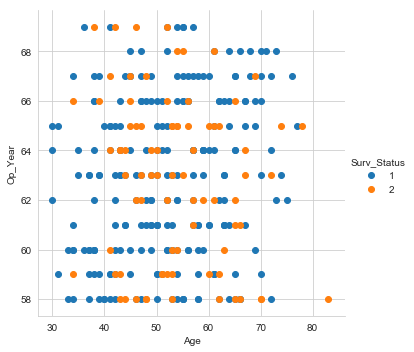

In [12]:
#using 2-D scatter plot as X==Age and Y== year of Operation
sns.set_style('whitegrid')
sns.FacetGrid(data_haberman, hue="Surv_Status", height=5) \
   .map(plt.scatter, "Age", "Op_Year") \
   .add_legend();
plt.show();

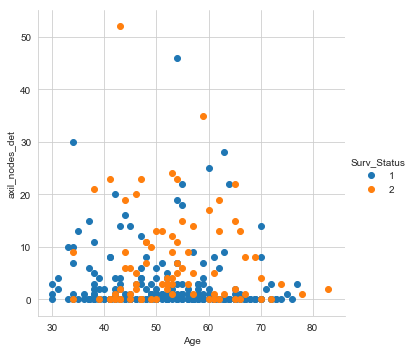

In [13]:
#using 2-D scatter plot as X==Age and Y== Node of Operation
sns.set_style('whitegrid')
sns.FacetGrid(data_haberman, hue="Surv_Status", height=5) \
   .map(plt.scatter, "Age", "axil_nodes_det") \
   .add_legend();
plt.show();

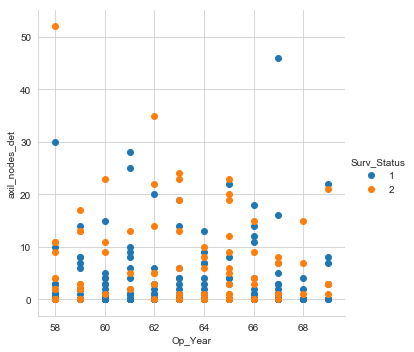

In [14]:
#using 2-D scatter plot as X==Op Year and Y== Node of Operation
sns.set_style('whitegrid')
sns.FacetGrid(data_haberman, hue="Surv_Status", height=5) \
   .map(plt.scatter, "Op_Year", "axil_nodes_det") \
   .add_legend();
plt.show();

Observation: 
From the above 2-D plots there is no clear distiction which one is the driving factor for the patients to be in Class 1(Patients survived 5 years or longer) and Class 2(Patients died within 5 years).

C:\Users\sayray.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


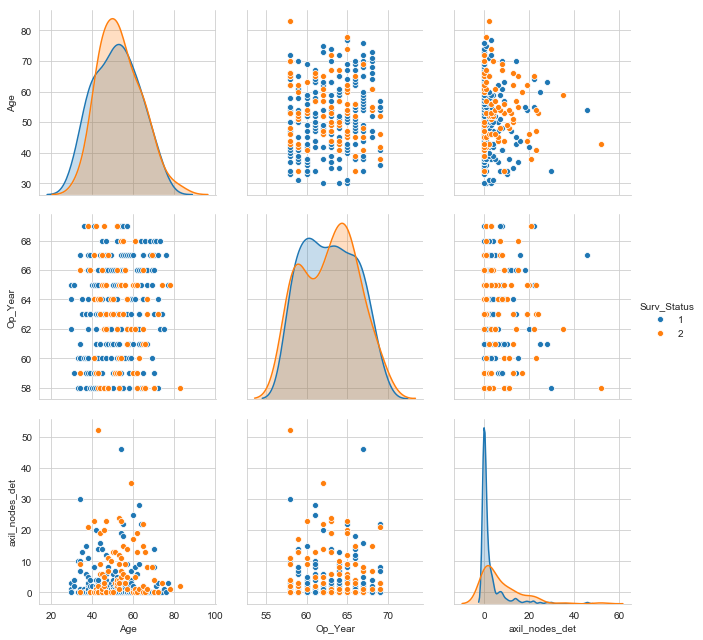

In [6]:
#using pair plot
sns.set_style("whitegrid");
sns.pairplot(data=data_haberman[["Age","Op_Year","axil_nodes_det", "Surv_Status"]], hue="Surv_Status", vars=["Age","Op_Year","axil_nodes_det"], height=3);
plt.show()

Observation: 
pair plot also not having any conclusive evidence as data are overlapping in the plot.

# PDF

C:\Users\sayray.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


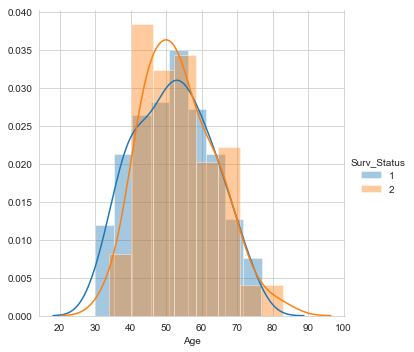

In [7]:
#PDF on Age : Plot 1
sns.FacetGrid(data_haberman, hue="Surv_Status", height=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

C:\Users\sayray.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


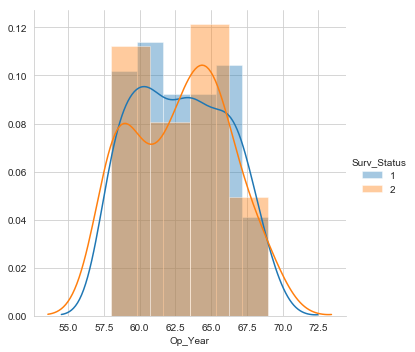

In [8]:
#PDF on Year of Operation : Plot 2
sns.FacetGrid(data_haberman, hue="Surv_Status", height=5) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();
plt.show();

C:\Users\sayray.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


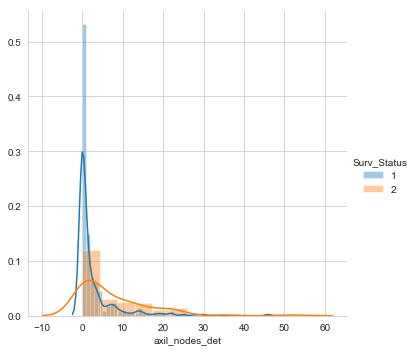

In [15]:
#PDF on Number of exil nodes : Plot 3
sns.FacetGrid(data_haberman, hue="Surv_Status", height=5) \
   .map(sns.distplot, "axil_nodes_det") \
   .add_legend();
plt.show();

Observation from Probability Density on Plot 1:
1. From the PDF plot with 'Age' it is evident that person having age less or equal to 34 have survided more than 5 years.
2. Person having age >= 35 and <= 40 have chances of survival more than 5 years is more than died before 5 years.
3. But beyond 40 not having any clear disctinction, both class have overlapped data.

Observation from Probability Density on Plot 2:
1. Here we can't have any clear decission as it is overlapping.

Observation from Probability Density on Plot 3:
1. If the person have number of exile nodes less than or equal to one Survived 5 years or longer is much higher and if person is having exile nodes 2 survived 5 years or more is little more than that of died before 5 years.
2. Beyond that died within 5 years has more probability density. 

CDF and PDF plot

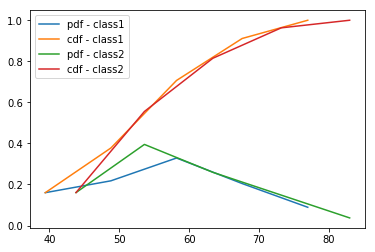

In [4]:
#Get data for each Class1 and Class 2 i.e. Survived 5 years or more and Died before 5 Years respectively
data_haberman_class1 = data_haberman.loc[data_haberman["Surv_Status"]==1]
data_haberman_class2 = data_haberman.loc[data_haberman["Surv_Status"]==2]

#plot for Age for class 1
counts, bin_edges = np.histogram(data_haberman_class1['Age'], bins=5,density = True)
#print(counts)
#print(bin_edges)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf - class1')
plt.plot(bin_edges[1:], cdf, label='cdf - class1')
plt.legend()

#plot for Age class 2
counts, bin_edges = np.histogram(data_haberman_class2['Age'], bins=5,density = True)
#print(counts)
#print(bin_edges)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf - class2')
plt.plot(bin_edges[1:], cdf, label='cdf - class2')
plt.legend()

Observation:
From the above plot it is evident that we don't have any clear conclusion from this plot, as most data is overlapped. Although CDF is almost 0.3 while age of the person is less than 44.

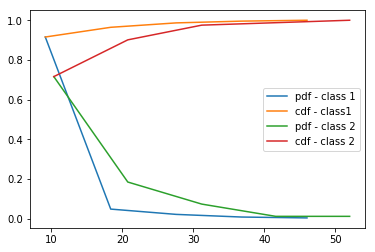

In [5]:
#Get data for each Class1 and Class 2 i.e. Survived 5 years or more and Died before 5 Years
#data_haberman_class1 = data_haberman.loc[data_haberman["Surv_Status"]==1]
#data_haberman_class2 = data_haberman.loc[data_haberman["Surv_Status"]==2]

#plot for Exil Nodes for class 1
counts, bin_edges = np.histogram(data_haberman_class1['axil_nodes_det'], bins=5,density = True)
#print(counts)
#print(bin_edges)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf - class 1')
plt.plot(bin_edges[1:], cdf, label='cdf - class1')
plt.legend()

#plot for Age class 2
counts, bin_edges = np.histogram(data_haberman_class2['axil_nodes_det'], bins=5,density = True)
#print(counts)
#print(bin_edges)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf - class 2')
plt.plot(bin_edges[1:], cdf, label='cdf - class 2')
plt.legend()

Observation:
From the above plot CDF is > 0.9 when num of exil nodes less than 10. So survival 5 yrs or more is high when number of Exil nodes are less than 10. Onthe other hand died within 5 years is increasing with number of exile nodes, it is around 90% while exile nodes more than 20 but ess than 30 i.e. approx 22

From CDF vs PDF plot we can conclude number of exil nodes have more impact on Class1 data i.e. Survided 5 years or more.

# Box Plot

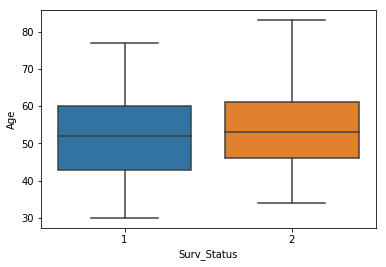

In [6]:
#Box Plot with respect to Age
sns.boxplot(x='Surv_Status', y='Age',data=data_haberman)
plt.show()

In [ ]:
Observation:
    We can see that while age is less than 44(approx) we have more than 25%(may be around 30%+) survived 5 years or more

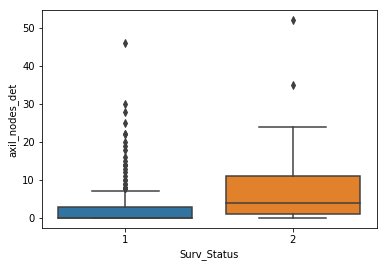

In [7]:
#Box Plot with respect to Age
sns.boxplot(x='Surv_Status', y='axil_nodes_det',data=data_haberman)
plt.show()

In [ ]:
Observation:
    1. More than 50% survided 5 years or more have number of exil nodes little more than 0 i.e. 1 or 2.
    2. Whereas more than 75% of data of died before 5 years says, person have more than 10 exil nodes.

# Violin Plot

C:\Users\sayray.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


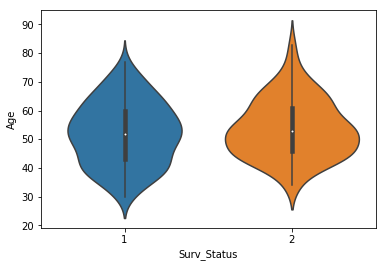

In [9]:
#Violin plot with respect to age
sns.violinplot(x="Surv_Status", y="Age", data=data_haberman, size=8)
plt.show()

Observation:
Nothig such non-overlapping data. So no such clear disctintion.

C:\Users\sayray.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


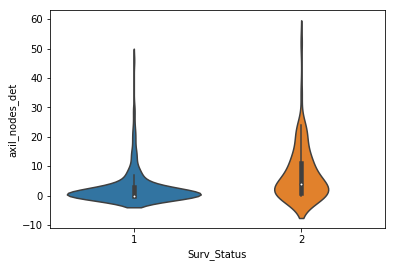

In [10]:
#Violin plot with respect to age
sns.violinplot(x="Surv_Status", y="axil_nodes_det", data=data_haberman, size=8)
plt.show()

Observation:
From this plot it can be said that when number of exil nodes is very less like 1-2 survival 5 years or more is have high values and whereas with the number of exil nodes increases died before 5 years are more.